## Vandna_Shobran_Project_EDA

## "Predicting Opioid Overdose Risk Using Public Health and Socioeconomic Data."

Abstract / Introduction:

One of the deadliest and most pressing public health crises in the US is still the opioid crisis. Overdose deaths have sharply increased in recent years due to the broad availability of prescription opioids and the growth of synthetic drugs like fentanyl. Despite municipal and federal attempts to address this situation, the statistics are nonetheless concerning. Data-driven technologies that can enable life-saving actions, predict dangers, and assist in discovering patterns are more important than ever.

I chose this project because the opioid crisis doesn’t just impact individuals; it touches families, communities, and the entire structure of our society. What drew me to this topic is not just the technical challenge, but the real-world impact that thoughtful data analysis can have. This isn’t just a class project; it’s a step toward understanding a national emergency that affects all of us, directly or indirectly.

Data.gov provided the used dataset, "Drug Overdose Death Rates by Drug Type, Sex, Age, Race, and Hispanic Origin: United States." With comprehensive demographic breakdowns and death estimates by year and medication type, it has almost 6,000 entries. We can examine the relationship between overdose risk and variables such as age, race, gender, and substance type, thanks to the dataset.

Recent academic research supports the use of machine learning in predicting opioid-related outcomes. For example, a study published in The Lancet Digital Health developed a machine learning model that predicted 3-month overdose risk among Medicaid beneficiaries with a C-statistic of over 0.84 across multiple states, demonstrating the real-world potential of these techniques. Similarly, a review published in npj Digital Medicine analyzed 44 machine learning studies focused on opioid-related harms, concluding that supervised learning models hold promise for public health monitoring. Another study published on PubMed Central used electronic health records to build high-accuracy models that identified patients at risk of overdose with up to 99% precision.

The goal of this project is to build a machine learning classification model that can predict whether a demographic group is at high risk or low risk of opioid overdose. Through exploratory data analysis, we will uncover the underlying trends. With feature engineering, we’ll transform raw data into meaningful inputs. Then, using supervised learning models such as logistic regression, decision trees, and ensemble techniques, we’ll evaluate which patterns are most predictive of overdose outcomes.

But the goal goes beyond just model accuracy. We aim to surface insights that could inform public health decisions—whether that’s identifying the most vulnerable groups, highlighting regional or demographic disparities, or proposing the types of data that health agencies should track more closely. If our model can even slightly improve how interventions are targeted, it could help reduce suffering and save lives.

This project is not just an academic exercise it is a call to apply data science for social good, to analyze a crisis that is ongoing and deeply human. It is a chance to see how the tools we learn in the classroom can directly serve the communities around us.

Technical Roadmap:

I will begin with exploratory data analysis (EDA) to visualize trends and uncover relationships.

I will perform data cleaning and engineer a binary classification label based on overdose risk.

I will apply categorical encoding and feature scaling where needed.

I will train and compare multiple classification models, including logistic regression, decision tree, and random forest.

I will use evaluation metrics such as precision, recall, F1-score, and ROC-AUC to assess model performance.

I will visualize feature importance and identify key risk factors.

At the end, I will conclude with recommendations for public health action and ideas for future model improvement.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [6]:
file_path = 'opioid_data.csv'

df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nColumn Information:")
df.info()

Dataset shape: (6228, 15)

First 5 rows:


,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN



Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6228 non-null   object 
 1   PANEL           6228 non-null   object 
 2   PANEL_NUM       6228 non-null   int64  
 3   UNIT            6228 non-null   object 
 4   UNIT_NUM        6228 non-null   int64  
 5   STUB_NAME       6228 non-null   object 
 6   STUB_NAME_NUM   6228 non-null   int64  
 7   STUB_LABEL      6228 non-null   object 
 8   STUB_LABEL_NUM  6228 non-null   float64
 9   YEAR            6228 non-null   int64  
 10  YEAR_NUM        6228 non-null   int64  
 11  AGE             6228 non-null   object 
 12  AGE_NUM         6228 non-null   float64
 13  ESTIMATE        5117 non-null   float64
 14  FLAG            1111 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 730.0+ KB


After loading the dataset, we confirmed that all columns have the appropriate data types for analysis. Categorical features like AGE, STUB_LABEL, and INDICATOR are stored as object types, while numerical fields like ESTIMATE, YEAR, and encoded demographic codes are properly stored as integers or floats. This ensured a smooth pipeline for encoding, scaling, and modeling later in the project.

In [9]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
INDICATOR            0
PANEL                0
PANEL_NUM            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE          1111
FLAG              5117
dtype: int64


Here w ecan see only two columns have missing values nad these are very important for us.

ESTIMATE (1111 missing): This is our target variable (death rate), so we cannot impute or guess it.

FLAG (5117 missing) This column seems to be notes or warnings, probably used by the CDC to mark data that’s suppressed or unreliable.

It is not needed for modeling unless we want to explore data quality issues.

In [12]:
# Look at rows where overdose rate is missing
missing_estimate = df[df['ESTIMATE'].isna()]
print("Missing ESTIMATE rows:", missing_estimate.shape[0])
missing_estimate[['INDICATOR', 'AGE', 'STUB_LABEL', 'YEAR']].head(10)

Missing ESTIMATE rows: 1111


,INDICATOR,AGE,STUB_LABEL,YEAR
1104,Drug overdose death rates,All ages,Male: Asian or Pacific Islander,1999
1184,Drug overdose death rates,All ages,Female: Asian or Pacific Islander,1999
1185,Drug overdose death rates,All ages,Female: Asian or Pacific Islander,2000
1186,Drug overdose death rates,All ages,Female: Asian or Pacific Islander,2001
1187,Drug overdose death rates,All ages,Female: Asian or Pacific Islander,2002
1188,Drug overdose death rates,All ages,Female: Asian or Pacific Islander,2003
1286,Drug overdose death rates,All ages,Male: Not Hispanic or Latino: Asian or Pacific...,1999
1388,Drug overdose death rates,All ages,Female: Not Hispanic or Latino: Asian or Pacif...,1999
1389,Drug overdose death rates,All ages,Female: Not Hispanic or Latino: Asian or Pacif...,2000
1390,Drug overdose death rates,All ages,Female: Not Hispanic or Latino: Asian or Pacif...,2001


What we’re seeing confirms a very common and important pattern: Most of the missing ESTIMATE values are for Asian or Pacific Islander groups, particularly in early years like 1999–2003.

What This Means:

These values were likely suppressed by the CDC due to low case counts (often done for privacy or statistical reliability).

These missing entries are not random, they’re tied to specific demographic groups and years.

Since my goal is predictive modeling, and ESTIMATE is my target, keeping rows without it will cause problems (I can't train a model without target values).

In [15]:
df.duplicated().sum()

0

In [17]:
df.describe()

,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,5117.000000
mean,2.500000,1.578035,3.028902,3.383006,2008.664740,10.664740,1.354913,4.743443
std,1.707962,0.493913,1.447036,1.526819,5.849512,5.849512,0.301459,6.424471
min,0.000000,1.000000,0.000000,0.100000,1999.000000,1.000000,1.100000,0.000000
25%,1.000000,1.000000,2.000000,2.100000,2004.000000,6.000000,1.100000,0.800000
50%,2.500000,2.000000,3.000000,3.220000,2009.000000,11.000000,1.200000,2.100000
75%,4.000000,2.000000,4.000000,4.600000,2014.000000,16.000000,1.600000,6.000000
max,5.000000,2.000000,5.000000,5.930000,2018.000000,20.000000,1.910000,54.300000


This output provides basic statistics for several numeric columns in the dataset. Most columns have 6,228 entries, but the ESTIMATE column has only 5,117, meaning it contains missing values. The data spans from the year 1999 to 2018, and overdose death rates (ESTIMATE) range widely from 0.0 to 54.3, with an average of 4.74, showing significant variation across groups. Columns like PANEL_NUM, UNIT_NUM, and STUB_NAME_NUM are likely coded versions of categories. While this output helps understand the range and distribution of each variable, it does not show whether these variables are related — further analysis is needed to check correlations or patterns.

In [20]:
for col in df.select_dtypes(include='object'):
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("-" * 40)

Value counts for INDICATOR:
INDICATOR
Drug overdose death rates    6228
Name: count, dtype: int64
----------------------------------------
Value counts for PANEL:
PANEL
All drug overdose deaths                                                         1038
Drug overdose deaths involving any opioid                                        1038
Drug overdose deaths involving natural and semisynthetic opioids                 1038
Drug overdose deaths involving methadone                                         1038
Drug overdose deaths involving other synthetic opioids (other than methadone)    1038
Drug overdose deaths involving heroin                                            1038
Name: count, dtype: int64
----------------------------------------
Value counts for UNIT:
UNIT
Deaths per 100,000 resident population, crude           3600
Deaths per 100,000 resident population, age-adjusted    2628
Name: count, dtype: int64
----------------------------------------
Value counts for STUB_NAME:
STU

Value counts for INDICATOR:

The INDICATOR column contains only one unique value: "Drug overdose death rates", repeated for all 6,228 rows. This tells us that the entire dataset is focused specifically on drug overdose death rates, so this column doesn’t add variation and won't be useful for grouping or modeling. It can be thought of as a label or constant descriptor of the dataset.

Value counts for STUB_LABEL:

The STUB_LABEL column contains detailed demographic labels that describe the population group each record refers to. These include combinations of:

Sex (Male, Female)

Race (e.g., White, Black or African American, Asian)

Hispanic origin

Age groups (e.g., 15–24 years, 75–84 years)

Totals (e.g., “All persons”)

Some labels appear 240 times (e.g., “All persons”, “Male”, “Female”) these likely reflect general or total population categories. Other labels, such as “Male: Not Hispanic or Latino: White” or “Female: 55–64 years”, appear 120 or 126 times, showing that the dataset includes intersectional breakdowns which is great for in-depth demographic analysis.

There are also a few labels with very low frequency (only 6 times), such as Native Hawaiian or Other Pacific Islander subgroups which could be due to small population sizes or suppressed reporting.

Overall, this column will be essential if I want to analyze trends by specific demographic groups, and it may be worth grouping or cleaning some rare subcategories to simplify analysis or visualizations.

Value counts for AGE:

The AGE column shows the age group each record corresponds to. Most age-specific groups (e.g., "15–24 years", "75–84 years") have an equal number of entries (360 each), indicating that the dataset is evenly distributed across different age categories.

The "All ages" group appears 2,988 times, which is significantly more frequent. These entries likely represent summary totals for all age groups combined and may be useful for high-level trend analysis — but should be handled separately from age-specific records during modeling or visualizations to avoid duplication or skewed results.

This column is key for understanding how drug overdose death rates vary by age, and it's useful for plotting age-wise trends or identifying vulnerable age brackets.

Value counts for FLAG:

The FLAG column contains an asterisk (*) for 1,111 records, and is empty (missing) for the rest. In government datasets, an asterisk usually indicates suppressed or unreliable data for example, values that are too small to report, or estimates with high uncertainty.

These flagged rows should be treated with caution. Depending on the analysis, you may choose to:

Exclude them to ensure accuracy.

Or mark them separately if you’re analyzing data completeness or limitations.

The presence of these flags highlights the need to be careful when interpreting the affected rows, especially if you're calculating averages or trends.

In [23]:
# Keep original dataset untouched
df_original = df.copy()

# Create a copy for modeling with complete target values
df_model = df[df['ESTIMATE'].notna()].copy()

In [25]:
missing_target_data = df[df['ESTIMATE'].isna()].copy()

In [27]:
# Rank Age Groups by Average Overdose Rate
df.groupby('AGE')['ESTIMATE'].mean().sort_values(ascending=False)

AGE
45-54 years          8.617222
35-44 years          8.462778
25-34 years          7.459722
55-64 years          5.116571
All ages             4.423863
15-24 years          3.066761
85 years and over    2.423485
65-74 years          1.937370
75-84 years          1.507650
Under 15 years       0.129677
Name: ESTIMATE, dtype: float64

45–54 years → 8.62 deaths per 100,000

35–44 years → 8.46

25–34 years → 7.46

These are the core working-age population meaning:

Prevention shouldn’t just focus on teens or elderly.

In [30]:
# Rank Demographic Groups (STUB_LABEL) by Risk
df.groupby('STUB_LABEL')['ESTIMATE'].mean().sort_values(ascending=False).head(10)

STUB_LABEL
Male: Not Hispanic or Latino: Native Hawaiian or Other Pacific Islander    17.700000
Male: 35-44 years                                                          11.090000
Male: 45-54 years                                                          10.609167
Male: 25-34 years                                                          10.597500
Male: Not Hispanic or Latino: American Indian or Alaska Native              9.173913
45-54 years                                                                 8.597500
35-44 years                                                                 8.456667
Male: Not Hispanic or Latino: White                                         7.811111
25-34 years                                                                 7.480000
Male: White                                                                 6.982540
Name: ESTIMATE, dtype: float64

Male: Not Hispanic or Latino: Native Hawaiian or Other Pacific Islander 17.7

Male (35–54 years) 11.09 to 10.61

Male: Not Hispanic or Latino: American Indian or Alaska Native 9.17

This shows overdose risk is:

Very high among specific racial/ethnic subgroups Often concentrated in middle-aged men Not evenly distributed across the population.

In [33]:
# Histogram (for distribution)

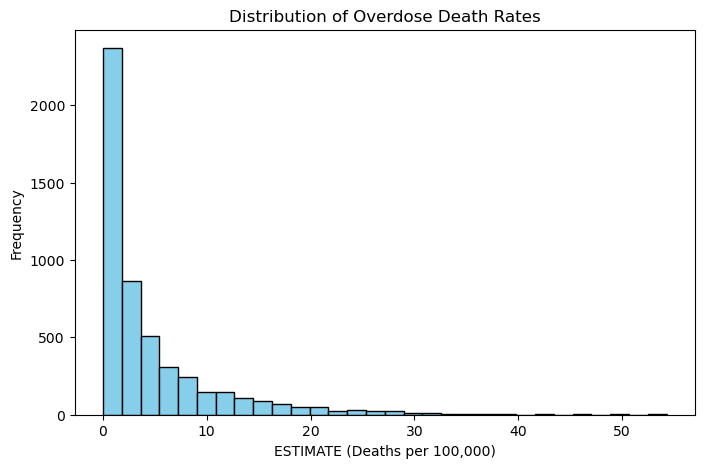

In [35]:
plt.figure(figsize=(8, 5))
df_model['ESTIMATE'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Overdose Death Rates')
plt.xlabel('ESTIMATE (Deaths per 100,000)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The histogram shows a heavily right-skewed distribution, with most overdose rates clustered near 0. High-rate cases are rare, which creates data imbalance and may challenge the model's ability to predict severe outcomes.

While the histogram shows that most overdose death rate (ESTIMATE) values in the dataset are low, the box plot reveals that these higher values are concentrated in specific age groups, particularly 35–54. This means that while high-risk cases exist, they are relatively rare overall. The imbalance helps explain the right-skewed shape of the histogram and the model’s challenge in accurately predicting high-risk outcomes.

In [38]:
# Let's try Box-plot

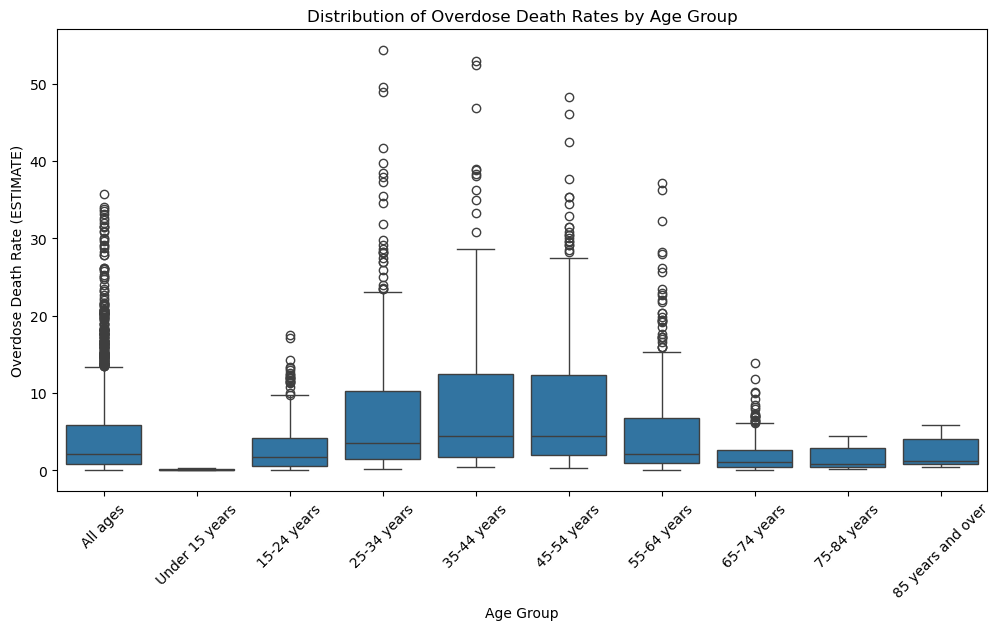

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AGE', y='ESTIMATE')
plt.xticks(rotation=45)
plt.title('Distribution of Overdose Death Rates by Age Group')
plt.ylabel('Overdose Death Rate (ESTIMATE)')
plt.xlabel('Age Group')
plt.show()

The box plot reveals clear differences in overdose death rates across age groups. Individuals under age 15 show overdose rates that are nearly zero, with little to no variation. Older groups, particularly those over 65, also show low rates. In contrast, the highest overdose death rates are concentrated in the 35–44 and 45–54 age groups, with medians reaching around 12–13 and wide variability. The 25–34 group follows closely, with a median near 10. These trends highlight that overdose risk is most severe in early to mid-adulthood. While age alone isn’t enough to make highly accurate predictions, it does serve as an important contributing feature in understanding overdose patterns within the dataset.

I just observed this. The box plot and histogram together tell an important story. The box plot shows that certain age groups, especially 35–54, have higher overdose death rates compared to others. However, the histogram reveals that most rows in the dataset have low overdose rates overall, with only a few rows showing high values. This is why the histogram is skewed to the right; most values are small, and high values are rare. This helps explain why the model may struggle to predict overdose risk: the data contains many low-risk cases and only a small number of high-risk ones.

In [43]:
# Bar Chart for One Year (2018) for Native Hawaiian or Other Pacific Islander data

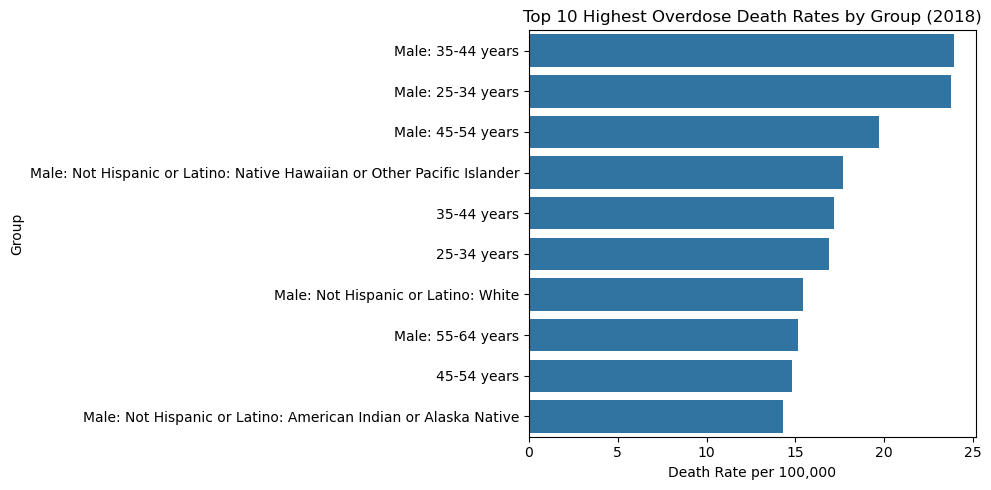

In [45]:
df_2018 = df[(df['YEAR'] == 2018) & (df['ESTIMATE'].notna())]

top_10 = df_2018.groupby('STUB_LABEL')['ESTIMATE'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10.values, y=top_10.index)
plt.title("Top 10 Highest Overdose Death Rates by Group (2018)")
plt.xlabel("Death Rate per 100,000")
plt.ylabel("Group")
plt.tight_layout()
plt.show()

In our bar chart of 2018 overdose death rates, the group with the highest recorded risk was "Male: 35–44 years", followed by other male age brackets and some race-specific subgroups. This confirms what we saw earlier in our age-based ranking that middle-aged males, especially those in the 35–54 age range, are at the highest risk of overdose death. This insight supports the need for age-targeted intervention programs focused on working-age men.

In [48]:
# Show Yearly Trend for High-Risk Group

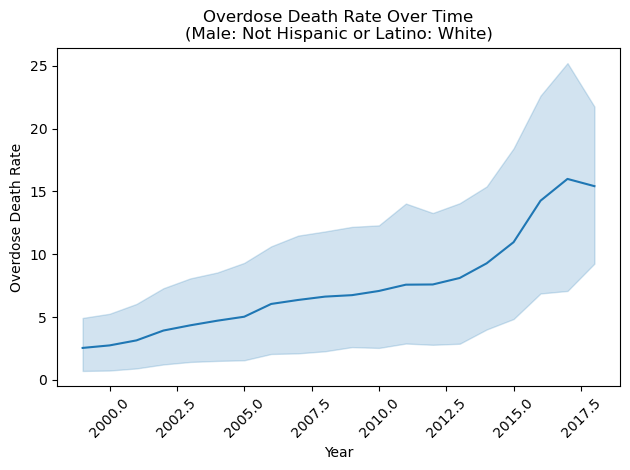

In [50]:
group = 'Male: Not Hispanic or Latino: White'
df_group = df[df['STUB_LABEL'] == group].dropna(subset=['ESTIMATE'])

sns.lineplot(data=df_group, x='YEAR', y='ESTIMATE')
plt.title(f"Overdose Death Rate Over Time\n({group})")
plt.xlabel("Year")
plt.ylabel("Overdose Death Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From our analysis, we observed that overdose death rates for "Male: Not Hispanic or Latino: White" have increased consistently over the years. This trend indicates a worsening public health crisis within this demographic, underscoring the need for targeted prevention efforts, increased access to treatment, and continued surveillance.

In [53]:
# Scatter Plot (for relationships)

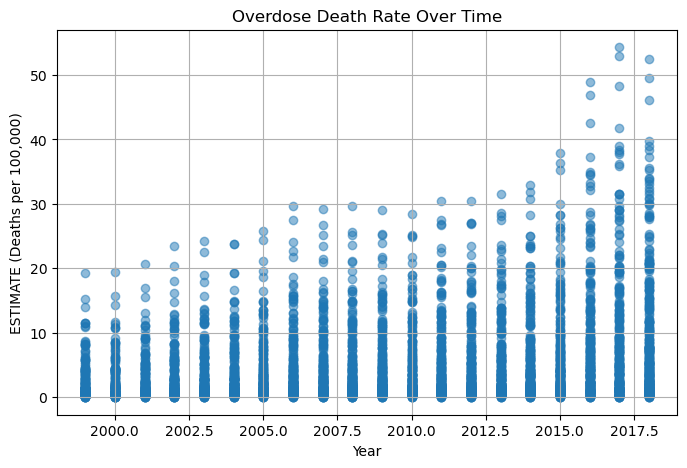

In [55]:
plt.figure(figsize=(8, 5))
plt.scatter(df_model['YEAR'], df_model['ESTIMATE'], alpha=0.5)
plt.title('Overdose Death Rate Over Time')
plt.xlabel('Year')
plt.ylabel('ESTIMATE (Deaths per 100,000)')
plt.grid(True)
plt.show()

The scatter plot shows overdose death rates (ESTIMATE) over time (YEAR) across all groups. Most data points are clustered at lower values, indicating that many groups had relatively low overdose rates throughout the dataset. However, a noticeable spike occurs between 2015 and 2017.5, where several points reach the highest death rates on the chart. This suggests a sharp rise in opioid-related deaths during that period.

In [58]:
# Let's try Heatmap

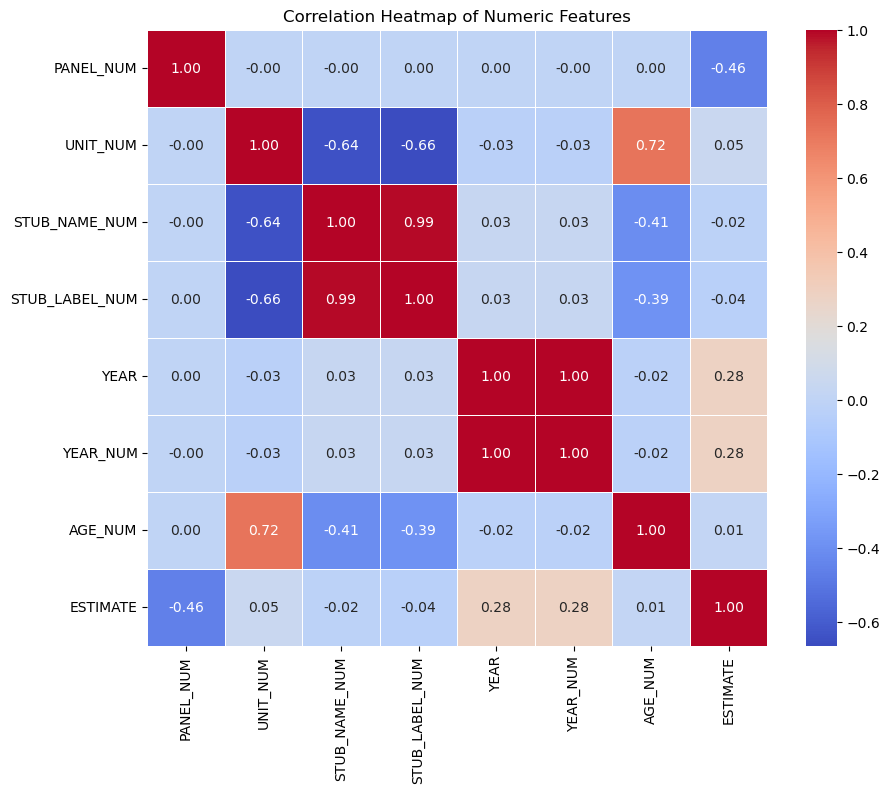

In [60]:
# let's Calculate correlation matrix for numeric columns only
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

The heatmap displays the pairwise correlation between numerical variables. As expected, all variables show a perfect correlation with themselves along the diagonal (correlation = 1). Some variables such as YEAR and YEAR_NUM, as well as STUB_NAME_NUM and STUB_LABEL_NUM, also show extremely high correlations, likely because they represent the same underlying information in different formats. These strong correlations suggest some redundancy, and such variables can potentially be dropped or consolidated during feature selection. Other variables, like AGE_NUM and ESTIMATE, may show only moderate correlation, reinforcing that no single feature dominates prediction. Overall, the heatmap suggests limited strong relationships across variables, which aligns with the model’s moderate performance.